# Q1. Explain the concept of precision and recall in the context of classification models.


Precision: Measures the accuracy of positive predictions. High precision means fewer false positives.

Recall: Measures the ability to identify all positive instances. High recall means fewer false negatives.

Both metrics provide valuable insights, and the choice between them depends on the specific goals and constraints of the problem being solved.

Precision and recall are two fundamental metrics used to evaluate the performance of classification models, especially when dealing with imbalanced datasets or when the costs of different types of errors are not equal. They provide insights into the model’s performance from different perspectives.

Precision

Definition: Precision is the ratio of correctly predicted positive instances to the total number of predicted positives. It measures how many of the instances predicted as positive are actually positive.

Recall (Sensitivity or True Positive Rate)

Definition: Recall is the ratio of correctly predicted positive instances to the total number of actual positives. It measures how well the model identifies all positive instances.

# Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?


F1 Score

Definition: The F1 score is a metric used to evaluate the performance of a classification model, particularly when dealing with imbalanced datasets or when both precision and recall are important. It is the harmonic mean of precision and recall, providing a single score that balances both metrics.

Differences from Precision and Recall
Precision focuses on the quality of the positive predictions, measuring how many of the predicted positive cases are actually positive. It is useful when the cost of false positives is high. For instance, in spam detection, precision ensures that legitimate emails are not misclassified as spam.

Recall focuses on the completeness of the positive predictions, measuring how many of the actual positive cases were identified. It is important when the cost of missing positive cases is high. For example, in medical diagnostics, high recall ensures that most actual positive cases are detected.

F1 Score: Unlike precision and recall, which provide separate views of performance, the F1 score provides a single metric that balances both precision and recall. It is particularly useful when you need to account for both false positives and false negatives and when there is an uneven class distribution. The F1 score is most beneficial when you need a balance between precision and recall, rather than focusing solely on one.

# Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?


ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are tools used to evaluate the performance of classification models, particularly binary classifiers.

ROC Curve

The ROC curve is a graphical representation of the trade-off between the True Positive Rate (TPR), also known as sensitivity or recall, and the False Positive Rate (FPR) across different threshold values.
True Positive Rate (TPR): Proportion of actual positives correctly identified by the model (also called recall).

False Positive Rate (FPR): Proportion of actual negatives incorrectly identified as positive by the model.


AUC (Area Under the ROC Curve)

AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
The AUC score is a single scalar value ranging between 0 and 1, where:
0.5 represents a model with no discriminative ability, equivalent to random guessing.
1.0 represents a perfect model that makes all predictions correctly.
0.0 represents a model that is perfectly wrong (predicting the opposite class for every instance).

How are ROC and AUC Used?

Model Comparison:

ROC curves and AUC scores allow for comparison between different models. A model with a higher AUC is generally considered better.
Threshold Selection: The ROC curve helps in selecting an optimal threshold by visualizing the trade-offs between sensitivity and specificity.
Imbalanced Data: AUC is particularly useful when dealing with imbalanced datasets, as it is insensitive to class distribution.

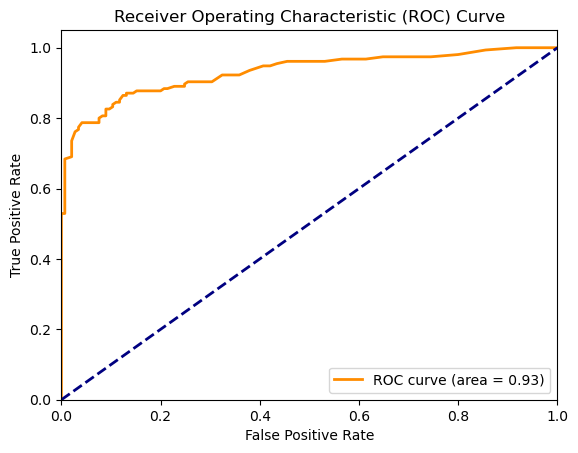

AUC: 0.93


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get the predicted probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Output the AUC
print(f"AUC: {roc_auc:.2f}")


# Q4. How do you choose the best metric to evaluate the performance of a classification model?

# What is multiclass classification and how is it different from binary classification?


Balanced vs. Imbalanced Classes:

Balanced Classes: When classes are roughly equal in size, metrics like accuracy can be appropriate.
Imbalanced Classes: When one class dominates, accuracy can be misleading. Instead, consider:
Precision: The proportion of true positives among all positive predictions. Important when the cost of false positives is high.
Recall (Sensitivity): The proportion of true positives among all actual positives. Important when the cost of false negatives is high.
F1-Score: The harmonic mean of precision and recall. Useful when you want a balance between precision and recall.
AUC-ROC: Useful for assessing the overall performance, especially with imbalanced data, as it evaluates model performance across all thresholds.
Precision-Recall Curve: Useful when the positive class is the minority class, focusing on the performance of predicting the positive class.
Type of Problem:

Spam Detection, Fraud Detection: Precision might be prioritized to avoid false positives.
Medical Diagnosis: Recall might be prioritized to minimize false negatives.
Business Context:

Cost-Sensitive Applications: Consider using cost-sensitive metrics or a custom loss function that reflects the cost of different types of errors.
Model Interpretability:

Simple Models (e.g., Logistic Regression): Accuracy might be sufficient if interpretability is key.
Complex Models (e.g., Neural Networks): Use more robust metrics like AUC or F1-score for evaluation.
Multiclass Classification vs. Binary Classification
Binary Classification:
Definition: Involves classifying data into one of two classes (e.g., spam vs. not spam).
Metrics: Common metrics include accuracy, precision, recall, F1-score, and AUC-ROC.
Example: Classifying emails as either "spam" or "not spam".
Multiclass Classification:
Definition: Involves classifying data into one of more than two classes (e.g., classifying types of animals into cats, dogs, and birds).

Metrics:

Accuracy: Overall correctness of the model, calculated as the proportion of correct predictions across all classes.
Precision, Recall, F1-Score: These can be computed for each class (one-vs-rest approach) and then averaged (macro, micro, or weighted averages).
Confusion Matrix: Extends to a square matrix for multiple classes, showing true positive and negative rates for each class.
Log Loss: Measures the uncertainty of predictions, used often in multiclass classification.
Evaluation Approaches:

One-vs-Rest (OvR): Decomposes the problem into multiple binary classification tasks, one for each class.
One-vs-One (OvO): Compares every pair of classes in binary classification tasks.
Key Differences:
Complexity: Multiclass classification is inherently more complex as it involves distinguishing between multiple classes rather than just two.
Evaluation: Metrics need to be adapted to consider multiple classes, often requiring averaging across classes or calculating metrics like macro/micro F1-scores.
Output: A multiclass classifier usually outputs probabilities or scores for each class, while a binary classifier outputs a single probability score.

# Q5. Explain how logistic regression can be used for multiclass classification.


Logistic Regression for Multiclass Classification
Logistic regression is traditionally used for binary classification, but it can be extended to multiclass classification problems using techniques like One-vs-Rest (OvR) and Multinomial Logistic Regression (also known as Softmax Regression).

1. One-vs-Rest (OvR) or One-vs-All (OvA) Approach
Concept: The One-vs-Rest strategy involves breaking down a multiclass classification problem into multiple binary classification problems. For each class, a separate binary logistic regression model is trained to distinguish that class from all other classes.

Process:

Suppose there are 
𝐾
K classes. You build 
𝐾
K binary classifiers, one for each class.
For each classifier, you treat the current class as the positive class and all others as the negative class.
During prediction, each model outputs a probability score for its respective class.
The class with the highest probability is chosen as the predicted class.
Advantages:

Simple and easy to implement.
Works well when there are a few classes.
Disadvantages:

Can be inefficient with a large number of classes.
Each model may produce conflicting predictions, requiring additional decision rules.

# Q6. Describe the steps involved in an end-to-end project for multiclass classification.


Define Problem and Objectives:

Clearly define the classification problem.
Set project objectives and success criteria.


Data Collection:

Gather relevant data from available sources.
Ensure data includes the features and target variable for classification.


Data Exploration and Visualization:


Perform exploratory data analysis (EDA).
Visualize data distributions, class imbalances, and feature correlations.


Data Preprocessing:

Handle missing values.
Encode categorical variables.
Normalize/standardize numerical features.
Split the dataset into training and testing sets.


Feature Engineering:

Create new features from existing data if needed.
Select important features based on domain knowledge or feature importance techniques.
Model Selection:

Choose a suitable classification algorithm (e.g., Logistic Regression, Random Forest, Neural Networks).
Consider using techniques like One-vs-Rest or Softmax for multiclass scenarios.


Model Training:

Train the selected model(s) using the training data.
Tune hyperparameters using cross-validation or grid search.


Model Evaluation:

Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score, etc.).
Use cross-validation to ensure model stability.
Analyze confusion matrix to understand misclassifications.


Model Optimization:

Fine-tune the model based on evaluation metrics.
Address issues like class imbalance if necessary (e.g., using oversampling or class weighting).


Model Testing:

Test the final model on the unseen test data.
Compare test performance with training performance to check for overfitting or underfitting.


Model Interpretation:

Interpret model predictions and feature importance.
Ensure model interpretability aligns with business requirements.


Deployment:

Deploy the model to a production environment.
Set up monitoring to track model performance over time.


Model Monitoring and Maintenance:

Continuously monitor the model's performance.
Update the model as needed based on new data or changing conditions.


Documentation and Reporting:

Document the entire process, including data sources, methodology, model performance, and insights.
Prepare a report or presentation for stakeholders.


Iteration and Improvement:

Gather feedback and iterate on the model if necessary.
Continue refining the model and updating it with new data as it becomes available.

# Q7. What is model deployment and why is it important?


What is Model Deployment?

Model deployment refers to the process of making a trained machine learning model available for use in a production environment. It involves integrating the model into an application or system where it can make predictions on new, unseen data in real-time or batch mode. Deployment can occur in various environments, including cloud platforms, on-premises servers, mobile devices, or embedded systems.

Steps in Model Deployment:
    
Model Packaging: Save the trained model in a deployable format (e.g., Pickle, ONNX).
API Creation: Wrap the model in an API using frameworks like Flask, FastAPI, or Django, allowing it to receive input data and return predictions.
Infrastructure Setup: Set up the necessary infrastructure, such as cloud servers or containers (e.g., Docker, Kubernetes), to host the model.
Integration: Integrate the model API with the front-end application, data pipelines, or other systems.
Testing: Test the model in the production environment to ensure it performs as expected.
Monitoring and Maintenance: Continuously monitor the model's performance and update it as needed.



Why is Model Deployment Important?

Real-World Application:

Deployment allows the model to provide value by making predictions on real-world data.
It turns a theoretical or experimental model into a practical tool that can be used by businesses, applications, or users.

Business Impact:

Enables organizations to leverage machine learning insights for decision-making, automation, and enhancing user experience.
Can drive efficiencies, increase revenue, and provide competitive advantages.


Scalability:

Deployment ensures that the model can handle a large volume of requests, making it scalable for widespread use.
It allows the model to be accessed by multiple users or systems simultaneously.


Continuous Improvement:

Deployment is not the final step; it is part of a cycle. Monitoring the model in production helps identify performance degradation, data drift, or changing patterns, enabling continuous improvement and retraining.


Integration with Business Processes:

Deployed models can be integrated into existing business workflows, enhancing automation and decision-making.
They can be used in applications like recommendation systems, fraud detection, customer segmentation, etc.


User Feedback and Iteration:

Real-world deployment provides feedback on how the model performs under actual conditions, offering insights for further tuning or improvement.
It enables iterative development and refinement based on real-time data and feedback.

# Q8. Explain how multi-cloud platforms are used for model deployment.


Multi-Cloud Platforms for Model Deployment

Multi-cloud platforms refer to the use of multiple cloud computing services from different cloud providers (such as AWS, Google Cloud, Azure, etc.) to deploy, manage, and scale applications, including machine learning models. This approach leverages the unique strengths and features of different cloud platforms to optimize performance, reliability, cost, and flexibility.

How Multi-Cloud Platforms Are Used for Model Deployment


Redundancy and High Availability:

Deploying models across multiple cloud providers ensures redundancy and high availability. If one cloud provider experiences downtime or issues, the model can still be accessed from another cloud provider, reducing the risk of service interruption.
  
Load Balancing and Scalability:

Multi-cloud platforms allow models to be deployed in different regions or across multiple clouds, enabling effective load balancing. This ensures that the application can handle increased traffic by distributing requests across different clouds, optimizing performance and response times.


Vendor Lock-In Avoidance:

Using a multi-cloud approach helps avoid dependency on a single cloud provider, mitigating the risk of vendor lock-in. It allows flexibility in moving workloads and models between different providers based on cost, performance, or strategic considerations.


Cost Optimization:

Different cloud providers may offer cost advantages for specific services. A multi-cloud strategy enables organizations to choose the most cost-effective options for different components of their deployment (e.g., storage, compute power, etc.), optimizing overall costs.


Compliance and Regulatory Requirements:

Deploying models across multiple clouds can help meet regional compliance and data residency requirements. For example, data can be processed in specific locations to comply with local regulations, while leveraging different cloud providers' services as needed.


Enhanced Security:

Multi-cloud deployment allows for the diversification of security measures across different providers. Organizations can implement additional layers of security, such as encryption and identity management, across different clouds to protect sensitive data and models.


Custom Solutions and Flexibility:

Multi-cloud platforms enable the use of specialized tools and services from different providers. For example, an organization might use Google Cloud's AI and machine learning tools while relying on AWS for storage and Azure for data analytics, combining the best features of each provider.


Disaster Recovery and Business Continuity:

In the event of a failure or disaster at one cloud provider, models and applications can continue to operate from another cloud, ensuring business continuity. This is crucial for mission-critical applications where downtime can have significant consequences.
Implementation Considerations


Interoperability:

Ensuring that models and data can move seamlessly between different cloud providers requires careful planning. Containerization with Docker or orchestration with Kubernetes can help achieve this.

Data Management:

Data synchronization across different cloud environments is critical to ensure consistency and accuracy in model predictions.

Monitoring and Management: 

Multi-cloud deployments require robust monitoring tools that can track performance, security, and costs across different platforms.

Integration: Integrating services from different cloud providers may require custom APIs or middleware to ensure smooth communication and data flow between platforms.

Example Use Cases
Global Enterprises: Large organizations with global operations may use multi-cloud deployments to meet local data regulations, optimize latency, and ensure high availability.

AI-Powered Applications: Applications like real-time recommendation systems or fraud detection systems may leverage multi-cloud platforms to ensure they are always operational and can scale rapidly based on demand.

Disaster Recovery: Multi-cloud strategies are often employed to build robust disaster recovery plans, ensuring that critical machine learning models and applications remain available in the event of a cloud provider's failure.

# Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud environment.

Benefits of Deploying Machine Learning Models in a Multi-Cloud Environment

Redundancy and High Availability:

Deploying across multiple cloud providers ensures that the application remains available even if one provider experiences downtime. This improves the reliability of the system and minimizes the risk of service interruptions.

Avoidance of Vendor Lock-In:

Using multiple cloud providers reduces dependency on a single vendor, allowing flexibility to switch providers if needed. This avoids being locked into a particular cloud ecosystem and can provide negotiating leverage for better pricing or services.

Cost Optimization:

Different cloud providers offer varied pricing models and discounts. By strategically distributing workloads, organizations can take advantage of the most cost-effective services from each provider, optimizing overall costs.

Geographic Flexibility and Compliance:

Multi-cloud deployments enable organizations to use specific cloud providers in different regions to comply with local data residency and privacy regulations, ensuring legal compliance while maintaining global operations.

Scalability:

Leveraging multiple clouds allows for horizontal scaling across different platforms, accommodating increased demand and ensuring that resources are used efficiently without overburdening a single cloud provider.

Access to Specialized Services:

Different cloud providers have strengths in various areas (e.g., Google Cloud's AI tools, AWS's compute power, Azure's enterprise integration). Multi-cloud allows organizations to combine these specialized services to create a more robust solution.

Disaster Recovery and Business Continuity:

Multi-cloud environments provide an added layer of protection against data loss and service disruption, as data and models can be replicated across clouds, ensuring continuity in the face of failures.
Challenges of Deploying Machine Learning Models in a Multi-Cloud Environment

Complexity of Management:

Managing and orchestrating resources, data, and models across multiple cloud platforms can be complex. It requires a deep understanding of each provider's infrastructure, APIs, and services, along with tools that can integrate and monitor these environments.

Interoperability Issues:

Ensuring that data, models, and applications are compatible and can move seamlessly between different cloud platforms can be challenging. Differences in cloud providers’ architectures, APIs, and services can create integration difficulties.

Data Synchronization and Latency:

Maintaining consistent data across multiple cloud environments is critical but can be difficult, particularly with real-time applications. Latency issues might arise when data and models are spread across geographically dispersed data centers.

Security and Compliance Risks:

While multi-cloud can enhance security by diversifying risk, it also introduces complexity in managing security policies, identity management, and compliance across different environments. Ensuring consistent security standards and adhering to regulations across clouds can be challenging.

Increased Operational Costs:

While multi-cloud can optimize costs, it can also lead to increased operational expenses due to the complexity of managing multiple environments, potentially requiring more skilled personnel and advanced tools.

Monitoring and Debugging:

Tracking the performance, errors, and usage across different cloud platforms can be complicated. Effective monitoring tools that work across multiple clouds are necessary, and debugging issues can become more challenging with distributed systems.

Data Transfer Costs:

Transferring data between different cloud providers can incur significant costs, particularly if large datasets are involved. These costs need to be carefully managed to avoid unexpectedly high expenses.

Resource Allocation and Load Balancing:

Efficiently allocating resources and balancing loads across multiple cloud environments can be tricky, especially when the traffic patterns are unpredictable or when different clouds have different capabilities and performance characteristics.